In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [2]:
data = pd.read_csv('turb1.csv')
wspd = data[['Day','Tmstamp','Wspd']].fillna(0)
wspd['date'] = pd.to_datetime(wspd['Day'].astype(str) + ' ' + data['Tmstamp'], format='%j %H:%M')
wspd = wspd.drop(['Day','Tmstamp'],axis=1)
wspd.set_index('date',inplace=True)
print(wspd.shape)

(35280, 1)


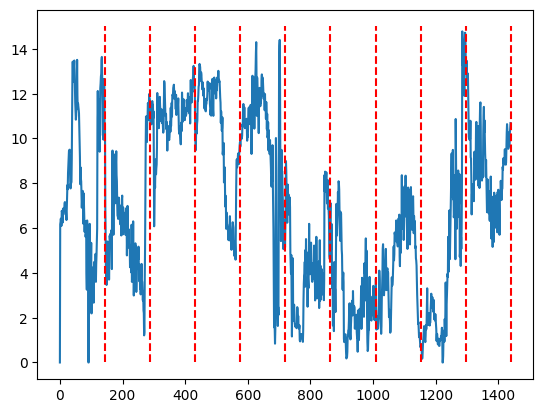

In [16]:
#查看前十天的风速
wspd_tmp = wspd['Wspd'][0:144*10].to_numpy().reshape(-1)
plt.plot(wspd_tmp)
plt.vlines([(i+1)*144 for i in range(0,10)],0,15,colors='red',linestyles='--')
plt.show()

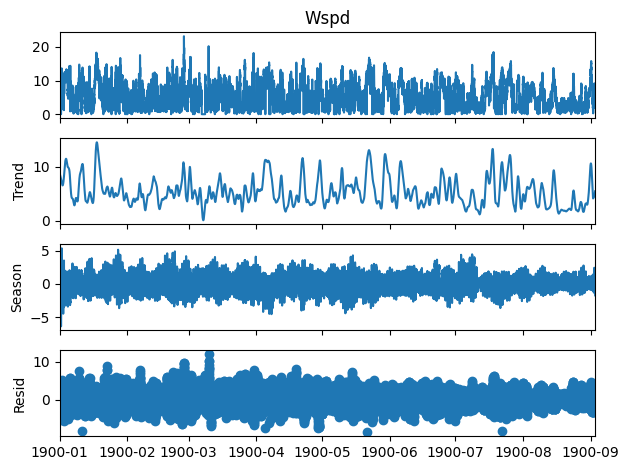

In [3]:
#以天为周期
res = STL(wspd['Wspd'],period=144).fit()
res.plot()
plt.show() 

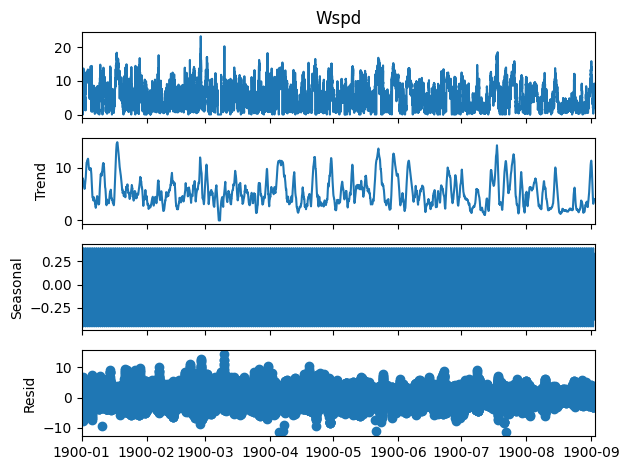

In [4]:
#以天为周期
result = sm.tsa.seasonal_decompose(wspd['Wspd'],model='additive',period=144)
result.plot()
plt.show()